In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.model_selection import train_test_split
import scipy.stats as  stats

In [32]:
df=pd.read_csv('train.csv',usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [34]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [35]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [37]:
from sklearn.impute import SimpleImputer
si=SimpleImputer()
df['Age']=si.fit_transform(df[['Age']])

In [38]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [40]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [39]:
from sklearn.model_selection import train_test_split
x=df.drop('Survived',axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


check for normalization of data using distplot and QQplot

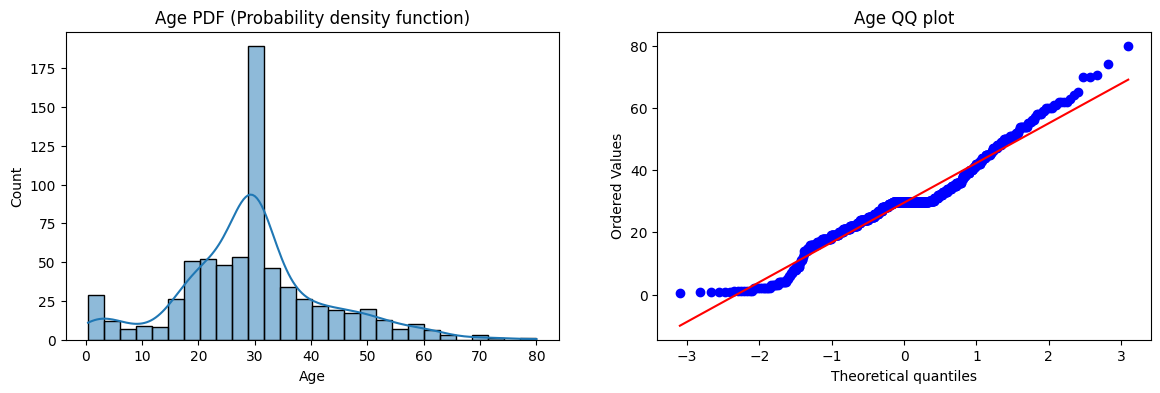

In [42]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(x_train['Age'],kde=True)
plt.title('Age PDF (Probability density function)')

plt.subplot(1,2,2)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title("Age QQ plot")
plt.show()

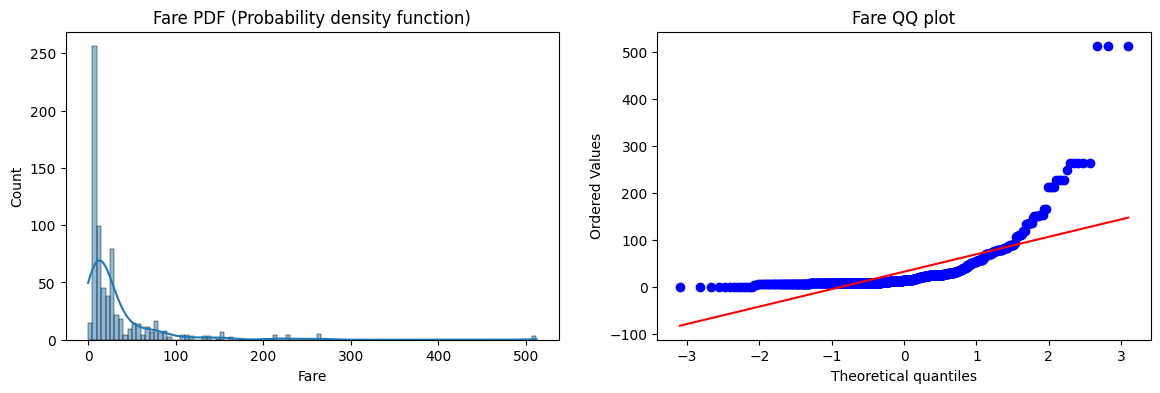

In [43]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(x_train['Fare'],kde=True)
plt.title('Fare PDF (Probability density function)')

plt.subplot(1,2,2)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title("Fare QQ plot")
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
model1=LogisticRegression()
model2=DecisionTreeClassifier()

In [45]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
predict1=model1.predict(x_test)
predict2=model2.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y_test,predict1)
accuracy2=accuracy_score(y_test,predict2)

In [49]:
accuracy1

0.6480446927374302

In [50]:
accuracy2

0.6815642458100558

In [54]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
sqrt_transformer=FunctionTransformer(np.sqrt,validate=True)
log1p_transformer=FunctionTransformer(np.log1p,validate=True)

preprocessor=ColumnTransformer( transformers=[
    ('age_sqrt',sqrt_transformer,['Age']),
    ('fare_log',log1p_transformer,['Fare'])
],remainder='passthrough')

pipe=Pipeline([
    ('prep',preprocessor),
])

In [55]:
pipe.fit(x_train)
x_train_transformed=pipe.transform(x_train)
x_test_transformed=pipe.transform(x_test)

In [56]:
model1.fit(x_train_transformed,y_train)
model2.fit(x_train_transformed,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
predict3=model1.predict(x_test_transformed)
predict4=model2.predict(x_test_transformed)

In [60]:
accuracy3=accuracy_score(y_test,predict3)
accuracy4=accuracy_score(y_test,predict4)

In [61]:
accuracy3

0.6703910614525139

In [62]:
accuracy4

0.6703910614525139